In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [15]:
# load cancer data
dataset = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target

In [16]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
# check distribution of target - 0=Malignant, 1=Benign
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [18]:
df.groupby("target").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [19]:
# Split data into features and target
X = df.drop(columns="target", axis=1)
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [20]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [21]:
# Creating layers for neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # input layer
    keras.layers.Dense(20, activation='relu'), # hidden layer
    keras.layers.Dense(2, activation='sigmoid') # output layer
])

/opt/anaconda3/envs/match-predict/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Compile neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
training = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7230 - loss: 0.6609 - val_accuracy: 0.8043 - val_loss: 0.5210
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.8323 - loss: 0.4278 - val_accuracy: 0.8478 - val_loss: 0.3468
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8801 - loss: 0.3160 - val_accuracy: 0.8696 - val_loss: 0.2586
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9105 - loss: 0.2602 - val_accuracy: 0.9348 - val_loss: 0.2125
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9154 - loss: 0.2264 - val_accuracy: 0.9348 - val_loss: 0.1858
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9266 - loss: 0.2027 - val_accuracy: 0.9348 - val_loss: 0.1673
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9259 - loss: 0.1841 - val_accuracy: 0.9348 - val_loss: 0.1528
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9292 - loss: 0.1689 - val_accuracy: 0.9565 - val_lo

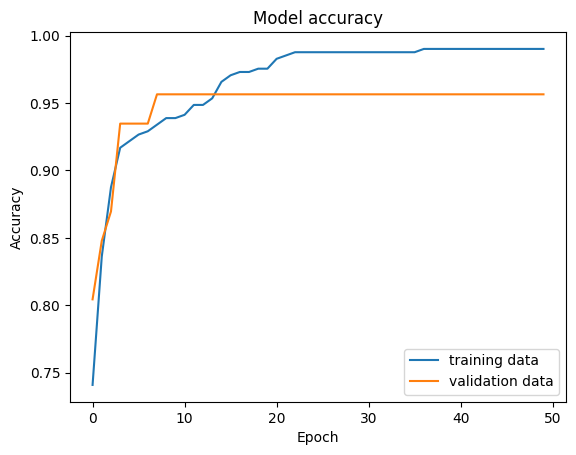

In [24]:
# Visualize accuracy and loss changes
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['training data', 'validation data'])

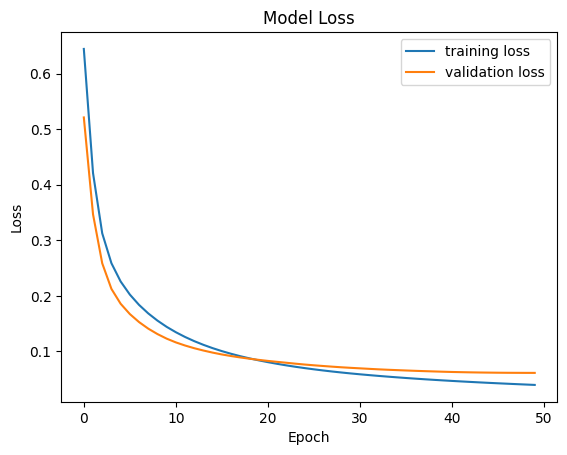

In [25]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(['training loss', 'validation loss'])

In [26]:
# Predict labels for test set
predictions = model.predict(X_test)
#Convert predictions to class labels
predictions = [np.argmax(i) for i in predictions]
print(predictions)

output_predictions = []
for prediction in predictions:
    if prediction == 0:
        output_predictions.append("Malignant")
    elif prediction == 1:
        output_predictions.append("Benign")
print(output_predictions)

# Evaluate model for test data
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
['Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Ben